In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

filename = "multipleLinearRegression.csv"
data = pd.read_csv(filename)

X = data.iloc[:, :-1].values  # All columns except last (independent variables)
Y = data.iloc[:, -1].values.reshape(-1, 1)  # Last column (dependent variable)
print(data)
print(X)
print(Y)

   x  y   z
0  1  4   1
1  2  5   6
2  3  8   8
3  4  2  12
[[1 4]
 [2 5]
 [3 8]
 [4 2]]
[[ 1]
 [ 6]
 [ 8]
 [12]]


In [2]:

ones = np.ones((X.shape[0], 1))  # Column of ones
X = np.hstack((ones, X))  # Append ones to X
print(ones)
print(X)

[[1.]
 [1.]
 [1.]
 [1.]]
[[1. 1. 4.]
 [1. 2. 5.]
 [1. 3. 8.]
 [1. 4. 2.]]


In [3]:

XT = X.T  # Transpose of X
XTX = np.dot(XT, X)  # X^T * X
XTX_inv = np.linalg.inv(XTX)  # Inverse of (X^T * X)
XTY = np.dot(XT, Y)  # X^T * Y
beta = np.dot(XTX_inv, XTY)  # Compute coefficients
print(beta)

[[-1.69945355]
 [ 3.48360656]
 [-0.05464481]]


[[ 1.56557377]
 [ 4.99453552]
 [ 8.31420765]
 [12.12568306]]


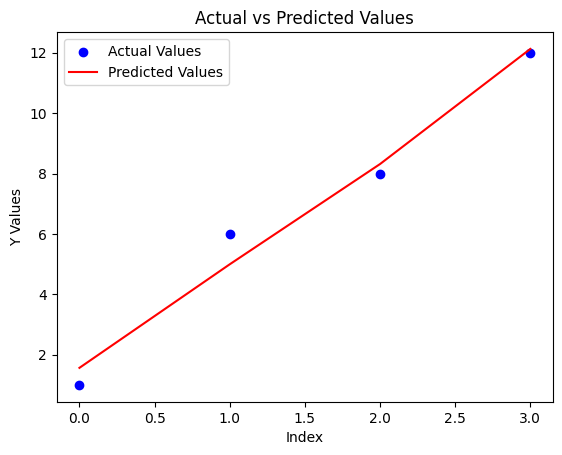

Coefficients (Beta):
 [[-1.69945355]
 [ 3.48360656]
 [-0.05464481]]
Predicted Y values:
 [[ 1.56557377]
 [ 4.99453552]
 [ 8.31420765]
 [12.12568306]]


In [4]:
Y_pred = np.dot(X, beta)  # Predicted values
print(Y_pred)
# Plot the graph
plt.scatter(range(len(Y)), Y, color='blue', label='Actual Values')
plt.plot(range(len(Y_pred)), Y_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
print("Coefficients (Beta):\n", beta)
print("Predicted Y values:\n", Y_pred)

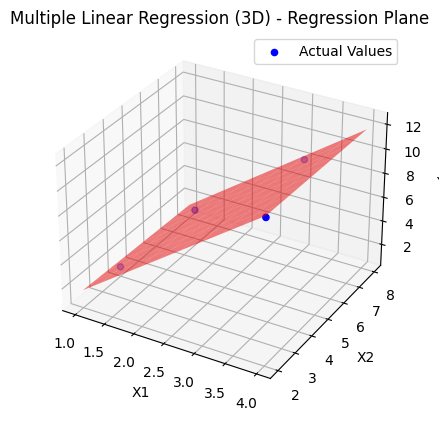

Coefficients (Beta):
 [[-1.69945355]
 [ 3.48360656]
 [-0.05464481]]
Predicted Y values:
 [[ 1.56557377]
 [ 4.99453552]
 [ 8.31420765]
 [12.12568306]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset from CSV
filename = "multipleLinearRegression.csv"
data = pd.read_csv(filename)

# Separate independent and dependent variables
X = data.iloc[:, :-1].values  # All columns except last (independent variables)
Y = data.iloc[:, -1].values.reshape(-1, 1)  # Last column (dependent variable)

# Step 1: Add intercept column of ones
ones = np.ones((X.shape[0], 1))  # Column of ones
X = np.hstack((ones, X))  # Append ones to X

# Step 2: Compute Normal Equation
XT = X.T  # Transpose of X
XTX = np.dot(XT, X)  # X^T * X
XTX_inv = np.linalg.inv(XTX)  # Inverse of (X^T * X)
XTY = np.dot(XT, Y)  # X^T * Y
beta = np.dot(XTX_inv, XTY)  # Compute coefficients

# Step 3: Make predictions
Y_pred = np.dot(X, beta)  # Predicted values

# Plot the actual vs predicted values for 2D case
if X.shape[1] == 2:
    plt.scatter(X[:, 1], Y, color='blue', label='Actual Values')
    plt.plot(X[:, 1], Y_pred, color='red', label='Regression Line')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Multiple Linear Regression (2D)')
    plt.legend()
    plt.show()

# Plot for 3D case (when there are two independent variables)
elif X.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 1], X[:, 2], Y, color='blue', label='Actual Values')
    
    # Create mesh grid for plane
    x1_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
    x2_range = np.linspace(min(X[:, 2]), max(X[:, 2]), 10)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    y_grid = beta[0] + beta[1] * x1_grid + beta[2] * x2_grid
    
    # Plot regression plane
    ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Multiple Linear Regression (3D) - Regression Plane')
    plt.legend()
    plt.show()

# Print results
print("Coefficients (Beta):\n", beta)
print("Predicted Y values:\n", Y_pred)


In [6]:


# Plot for 3D case (when there are two independent variables)
if X.shape[1] == 3:
    x1_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
    x2_range = np.linspace(min(X[:, 2]), max(X[:, 2]), 10)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    y_grid = beta[0] + beta[1] * x1_grid + beta[2] * x2_grid
    
    fig = go.Figure()
    
    # Add actual data points
    fig.add_trace(go.Scatter3d(
        x=X[:, 1], y=X[:, 2], z=Y.flatten(),
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='Actual Values'
    ))
    
    # Add regression plane
    fig.add_trace(go.Surface(
        x=x1_range, y=x2_range, z=y_grid,
        colorscale='reds', opacity=0.5,
        name='Regression Plane'
    ))
    
    fig.update_layout(
        scene=dict(
            xaxis_title='X1',
            yaxis_title='X2',
            zaxis_title='Y'
        ),
        title='Interactive 3D Multiple Linear Regression'
    )
    
    fig.show()

# Print results
print("Coefficients (Beta):\n", beta)
print("Predicted Y values:\n", Y_pred)


Coefficients (Beta):
 [[-1.69945355]
 [ 3.48360656]
 [-0.05464481]]
Predicted Y values:
 [[ 1.56557377]
 [ 4.99453552]
 [ 8.31420765]
 [12.12568306]]


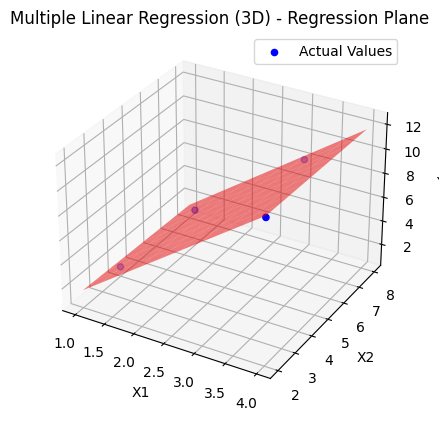

Coefficients (Beta):
 [[-1.69945355]
 [ 3.48360656]
 [-0.05464481]]
Predicted Y values:
 [[ 1.56557377]
 [ 4.99453552]
 [ 8.31420765]
 [12.12568306]]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset from CSV
filename = "multipleLinearRegression.csv"
data = pd.read_csv(filename)

# Separate independent and dependent variables
X = data.iloc[:, :-1].values  # All columns except last (independent variables)
Y = data.iloc[:, -1].values.reshape(-1, 1)  # Last column (dependent variable)

# Step 1: Add intercept column of ones
ones = np.ones((X.shape[0], 1))  # Column of ones
X = np.hstack((ones, X))  # Append ones to X

# Step 2: Compute Normal Equation
XT = X.T  # Transpose of X
XTX = np.dot(XT, X)  # X^T * X
XTX_inv = np.linalg.inv(XTX)  # Inverse of (X^T * X)
XTY = np.dot(XT, Y)  # X^T * Y
beta = np.dot(XTX_inv, XTY)  # Compute coefficients

# Step 3: Make predictions
Y_pred = np.dot(X, beta)  # Predicted values

# Plot the actual vs predicted values for 2D case
if X.shape[1] == 2:
    plt.scatter(X[:, 1], Y, color='blue', label='Actual Values')
    plt.plot(X[:, 1], Y_pred, color='red', label='Regression Line')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Multiple Linear Regression (2D)')
    plt.legend()
    plt.show()

# Plot for 3D case (when there are two independent variables)
elif X.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 1], X[:, 2], Y, color='blue', label='Actual Values')
    
    # Create mesh grid for plane
    x1_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
    x2_range = np.linspace(min(X[:, 2]), max(X[:, 2]), 10)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    y_grid = beta[0] + beta[1] * x1_grid + beta[2] * x2_grid
    
    # Plot regression plane
    ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Multiple Linear Regression (3D) - Regression Plane')
    plt.legend()
    plt.show()

# Print results
print("Coefficients (Beta):\n", beta)
print("Predicted Y values:\n", Y_pred)
